In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn import ensemble, model_selection, datasets, metrics, tree
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import numpy as np
import pandas as pd

Импортируем датасет digits и подготавливаем матрицу признаков и ответы на обучающей выборке

In [3]:
digits = load_digits()

X = digits.data
y = digits.target

### Задание 1
Создаем решающее дерево с настройками по умолчанию и измеряем качество его работы

In [4]:
clf = DecisionTreeClassifier()

In [5]:
def write_answer_1(score_1):
    with open("answer_1.txt", "w") as fout:
        fout.write(str(score_1))

In [6]:
score_1 = cross_val_score(clf, X, y, cv = 10).mean()
print(score_1)      
write_answer_1(score_1)

0.8191185599006829


### Задание 2
Обучаем бэггинг с настройками по умолчанию над 100 решающими деревьями

In [7]:
clf = BaggingClassifier(n_estimators = 100)

In [8]:
def write_answer_2(score_2):
    with open("answer_2.txt", "w") as fout:
        fout.write(str(score_2))

In [9]:
score_2 = cross_val_score(clf, X, y, cv = 10).mean()
print(score_2)      
write_answer_2(score_2)

0.921489757914339


### Задание 3
Выберем параметры BaggingClassifier таким образом, чтобы каждый базовый алгоритм обучался не на всех $d$ признаках, а на $\sqrt{d}$ случайных признаков

In [10]:
clf = BaggingClassifier(n_estimators = 100, max_features = 8)

In [11]:
def write_answer_3(score_3):
    with open("answer_3.txt", "w") as fout:
        fout.write(str(score_3))

In [12]:
score_3 = cross_val_score(clf, X, y, cv = 10).mean()
print(score_3)      
write_answer_3(score_3)

0.9293202979515829


### Задание 4
Теперь будем выбирать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева

In [13]:
clf = BaggingClassifier(base_estimator = DecisionTreeClassifier(max_features = "sqrt"), n_estimators = 100)

In [14]:
def write_answer_4(score_4):
    with open("answer_4.txt", "w") as fout:
        fout.write(str(score_4))

In [15]:
score_4 = cross_val_score(clf, X, y, cv = 10).mean()
print(score_4)      
write_answer_4(score_4)

0.9493513345747981


### Задание 5
Рассмотрим RandomForestClassifier и проанализируем, как качество классификации зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева

In [16]:
clf_base = RandomForestClassifier(n_estimators = 100)

In [17]:
print(cross_val_score(clf_base, X, y, cv = 10).mean())

0.9499130974549969


Построим график зависимости качества классификации от количества деревьев

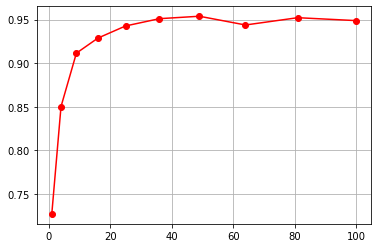

In [18]:
n_estimators = [i**2 for i in range(1, 11)]
scores = [cross_val_score(RandomForestClassifier(n_estimators = k), X, y, cv = 10).mean() for k in n_estimators]
pylab.grid(True)
pylab.plot(n_estimators, scores, 'r-', marker = 'o')

Построим график зависимости качества классификации от количества признаков, выбираемых при построении каждой вершины дерева

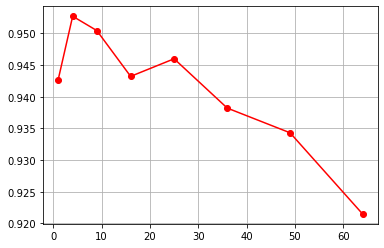

In [19]:
max_features = [i**2 for i in range(1, 9)]
scores = [cross_val_score(RandomForestClassifier(n_estimators = 100, max_features = k),
                                                 X, y, cv = 10).mean() for k in max_features]
pylab.grid(True)
pylab.plot(max_features, scores, 'r-', marker = 'o')

Построим график зависимости качества классификации от допустимой глубины дерева

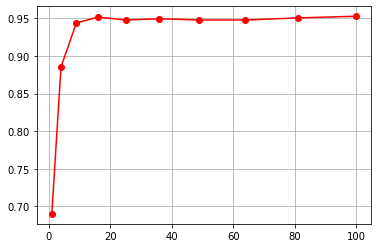

In [20]:
max_depth = [i**2 for i in range(1, 11)]
scores = [cross_val_score(RandomForestClassifier(n_estimators = 100, max_depth = k),
                                                 X, y, cv = 10).mean() for k in max_depth]
pylab.grid(True)
pylab.plot(max_depth, scores, 'r-', marker = 'o')

In [21]:
def write_answer_5():
    with open("answer_5.txt", "w") as fout:
        fout.write(" ".join(str(num) for num in [2, 3, 4, 7]))

In [22]:
write_answer_5()